In [75]:
import spotipy
import spotipy.util as util
import json
import pandas as pd
from spotipy.oauth2 import SpotifyClientCredentials
import matplotlib.pyplot as plt



In [36]:
%env SPOTIPY_CLIENT_ID = "16a4e0ff93334a0ba81f6f784e0292b7"
%env SPOTIPY_CLIENT_SECRET = '7acb5218466741a18896ac54797a0156'

scope = 'playlist-read-private playlist-read-collaborative user-library-read user-read-recently-played user-top-read'
redirect_uri = "http://localhost/"
username = "chriscc301916"
client_id = "16a4e0ff93334a0ba81f6f784e0292b7"
client_secret = "7acb5218466741a18896ac54797a0156"


post_uri = 'spotify:artist:246dkjvS1zLTtiykXe5h60'

spotify = spotipy.client.Spotify(client_credentials_manager = SpotifyClientCredentials(client_id = client_id, client_secret = client_secret))

results = spotify.artist_albums(post_uri, album_type='album')
albums = results['items']

while results['next']:
    results = spotify.next(results)
    albums.extend(results['items'])

env: SPOTIPY_CLIENT_ID="16a4e0ff93334a0ba81f6f784e0292b7"
env: SPOTIPY_CLIENT_SECRET='7acb5218466741a18896ac54797a0156'


In [49]:
album_uris = [albums[i]["uri"] for i in range(len(albums))]

pm_songs  = {}
for uri in album_uris:
    album = spotify.album_tracks(uri)['items']
    for i in range(len(album)):
        pm_songs[album[i]['name']] = album[i]['uri']
print(pm_songs)


{"Hollywood's Bleeding": 'spotify:track:19iGLq3w4Q1e8gg6qSGfRj', 'Saint-Tropez': 'spotify:track:51fG7ydQm27FiPo88Gi1RT', 'Enemies (feat. DaBaby)': 'spotify:track:70kYmAusgHwkBIk944STcj', 'Allergic': 'spotify:track:0mDmG70LDwF8pLDRQ2UgT7', 'A Thousand Bad Times': 'spotify:track:2IlaU3eLHt3NpylRdBmi7Z', 'Circles': 'spotify:track:6KjegbJPzNRetrgFJiHVMp', 'Die For Me (feat. Future & Halsey)': 'spotify:track:1AuH8eXCNIzojMqt5xBrSO', 'On The Road (feat. Meek Mill & Lil Baby)': 'spotify:track:0Y8QvQxB3fraIEBuWPW9er', 'Take What You Want (feat. Ozzy Osbourne & Travis Scott)': 'spotify:track:3sORDiSRTAlxecx5xJAqc8', "I'm Gonna Be": 'spotify:track:58tGA0YI9A4125KpIZhkHU', 'Staring At The Sun (feat. SZA)': 'spotify:track:0KEspatN1t1SAZUfm22c4z', 'Sunflower - Spider-Man: Into the Spider-Verse': 'spotify:track:6nY9ga57plhBYQnZX0Oqe8', 'Internet': 'spotify:track:4U3m2QS28oO5VM7G9BiRme', 'Goodbyes (feat. Young Thug)': 'spotify:track:6cIYFBwTv4JGpX7wOk5VIu', 'Myself': 'spotify:track:1Sg6DGutLrmuhzY1G3

In [72]:
data = pd.read_csv("C:\\Users\\chris\\Documents\\GitHub\\Crescendo\\data\\topCharts.csv")

data = data.drop(columns = ["Unnamed: 0", "Id"], axis = 1)
data["Date"] = pd.to_datetime(data["Date"])

pm_topdata = data[data["Artist"] == "Post Malone"]

pm_songnames = set(pm_songs.keys())
pm_topsongnames = set(pm_topdata["Title"])

pm_nottopsongnames = pm_songnames.difference(pm_topsongnames)

print(pm_nottopsongnames)

{'Yours Truly, Austin Post', 'Broken Whiskey Glass', 'Psycho', 'Up There', 'Patient', 'Hit This Hard', 'Too Young', 'Big Lie', 'Ball For Me', 'Goodbyes (feat. Young Thug)', 'Money Made Me Do It', 'Leave', 'Cold', 'Same Bitches', 'Feeling Whitney', 'Spoil My Night', 'Feel'}


    danceability  energy  key  loudness  mode  speechiness  acousticness  \
0          0.649   0.618    6    -5.736     1       0.0729         0.505   
1          0.353   0.666    7    -7.389     0       0.0701         0.359   
2          0.755   0.557    8    -7.991     1       0.1090         0.532   
3          0.630   0.374    5    -8.116     0       0.0314         0.405   
4          0.752   0.659    3    -6.132     1       0.1390         0.550   
5          0.625   0.565    0    -8.944     1       0.0474         0.268   
6          0.635   0.609    4    -6.192     0       0.0434         0.397   
7          0.444   0.679    6    -5.012     0       0.1680         0.230   
8          0.775   0.527    6    -4.213     0       0.2960         0.511   
9          0.593   0.653    5    -3.772     1       0.0731         0.411   
10         0.719   0.431    7    -6.495     1       0.1820         0.297   
11         0.541   0.561    4    -7.410     1       0.0228         0.230   
12         0

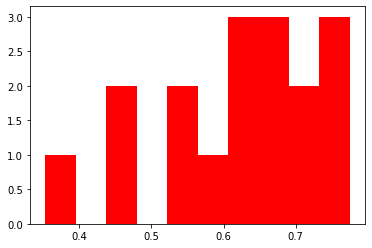

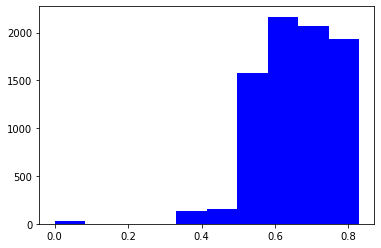

In [78]:
song_uris = [pm_songs[song] for song in pm_nottopsongs]

song_features_dict = {}
song_features = spotify.audio_features(tracks = song_uris)
for i in song_features[0].keys():
    song_features_dict[i] = []

for i in range(len(song_features)):
    sf = song_features[i]
    for k in sf.keys():
        song_features_dict[k].append(sf[k])


pm_nottopdata = pd.DataFrame.from_dict(song_features_dict)
df['Title'] = pm_nottopsongnames
pm_nottopdata = pm_nottopdata.drop(columns = ["analysis_url", "track_href", "uri", "id", "type"])
print(pm_nottopdata)


plt.hist(pm_nottopdata["danceability"], color = "red")
plt.show()
plt.hist(pm_topdata["Danceability"], color = "blue")
plt.show()